# How to know if you are eligible for a house loan (or not).

## Building a classification model that can tell if one is able to get a house loan

## ETL & Data Cleaning

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='Train_Loan_Home.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df_loan = df_data_1

In [3]:
df_loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [4]:
df_loan = df_loan.dropna()

In [5]:
df_loan.reset_index(inplace = True)

In [6]:
df_loan.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [7]:
df_loan.drop("index", axis = 1, inplace = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## PRE-PROCESSING AND DATA EXPLORATION

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [10]:
df_loan1 = df_loan[['Education','Gender']]

In [11]:
df_loan1 = pd.concat([df_loan1, pd.get_dummies(df_loan['Loan_Status'])], axis = 1)

In [12]:
df_loan1.head()

,Education,Gender,N,Y
0,Graduate,Male,1,0
1,Graduate,Male,0,1
2,Not Graduate,Male,0,1
3,Graduate,Male,0,1
4,Graduate,Male,0,1


In [13]:
df_loan1['Demographic'] = df_loan1['Gender'].str.cat(df_loan1['Education'],sep=", ")

In [14]:
df_loan1.head()

,Education,Gender,N,Y,Demographic
0,Graduate,Male,1,0,"Male, Graduate"
1,Graduate,Male,0,1,"Male, Graduate"
2,Not Graduate,Male,0,1,"Male, Not Graduate"
3,Graduate,Male,0,1,"Male, Graduate"
4,Graduate,Male,0,1,"Male, Graduate"


In [15]:
df_loan2 = df_loan1['Demographic'].value_counts().to_frame()
df_loan2.rename(columns={'Demographic': 'Frequency'}, inplace=True)
df_loan2.index.name = "Demographic"
df_loan2.head()

,Frequency
Demographic,
"Male, Graduate",310
"Male, Not Graduate",84
"Female, Graduate",73
"Female, Not Graduate",13


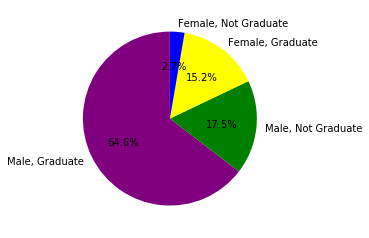

In [16]:
demo = df_loan2.index
freq = df_loan2['Frequency']
colors = ['purple', 'green', 'yellow', 'blue']
plt.pie(freq, labels=demo, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [17]:
df_loan3 = df_loan1[df_loan1['Y'] != 1]
df_loan3 = df_loan1[df_loan1['Gender'] == 'Male']

In [18]:
df_loan4 = df_loan3['Demographic'].value_counts().to_frame()
df_loan4.rename(columns={'Demographic': 'Frequency'}, inplace=True)
df_loan4.index.name = "Demographic"
df_loan4.head()

,Frequency
Demographic,
"Male, Graduate",310
"Male, Not Graduate",84


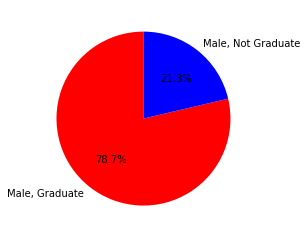

In [19]:
demo1 = df_loan4.index
freq1 = df_loan4['Frequency']
colors = ['red', 'blue']
plt.pie(freq1, labels=demo1, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [20]:
df_loan5 = df_loan1[df_loan1['Y'] != 1]
df_loan5 = df_loan1[df_loan1['Gender'] == 'Female']

In [21]:
df_loan6 = df_loan5['Demographic'].value_counts().to_frame()
df_loan6.rename(columns={'Demographic': 'Frequency'}, inplace=True)
df_loan6.index.name = "Demographic"
df_loan6.head()

,Frequency
Demographic,
"Female, Graduate",73
"Female, Not Graduate",13


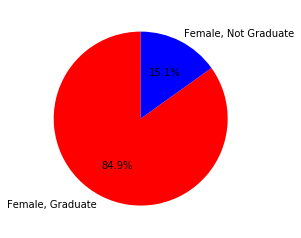

In [22]:
demo2 = df_loan6.index
freq2 = df_loan6['Frequency']
colors = ['red', 'blue']
plt.pie(freq2, labels=demo2, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [23]:
df_loan7 = df_loan1[df_loan1['Y'] != 1]

In [24]:
df_loan8 = df_loan7['Education'].value_counts().to_frame()
df_loan8.rename(columns={'Education': 'Frequency'}, inplace=True)
df_loan8.index.name = "Education"
df_loan8.head()

,Frequency
Education,
Graduate,112
Not Graduate,36


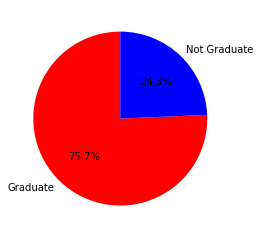

In [25]:
demo3 = df_loan8.index
freq3 = df_loan8['Frequency']
colors = ['red', 'blue']
plt.pie(freq3, labels=demo3, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [26]:
df_loan['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
df_loan['Property_Area'].replace(to_replace=['Rural','Urban','Semiurban'], value=[0,1,2],inplace=True)
df_loan['Dependents'].replace(to_replace=['3+'], value=[3],inplace=True)
df_loan['Married'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df_loan['Education'].replace(to_replace=['Not Graduate','Graduate'], value=[0,1],inplace=True)
df_loan['Self_Employed'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df_loan.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
1,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
2,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
3,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
4,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y


## CLASSIFICATION MODELLING

### K-NEAREST NEIGHBOURS

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
df_loan_y = df_loan['Loan_Status'].values
df_loan_y[0:5]

array(['N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [30]:
df_loan_x = df_loan
df_loan_x.drop(["Loan_Status","Loan_ID"], axis = 1, inplace = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_loan_x,df_loan_y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (384, 11) (384,)
Test set: (96, 11) (96,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    loan1 = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    loan2 = loan1.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, loan2)

    
    std_acc[n-1]=np.std(loan2==y_test)/np.sqrt(loan2.shape[0])

mean_acc

array([0.57291667, 0.51041667, 0.5625    , 0.5       , 0.61458333,
       0.60416667, 0.63541667, 0.63541667, 0.64583333])

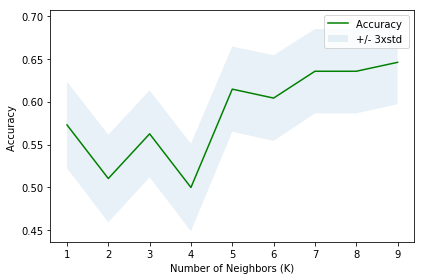

In [33]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [34]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6458333333333334 with k= 9


In [35]:
k = 9
#Train Model and Predict  
loan3 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
loan3

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [36]:
test_set = metrics.accuracy_score(y_test, loan3.predict(x_test))
print("Test set Accuracy: {:.2f}".format(test_set))

Test set Accuracy: 0.65


In [37]:
tn, fp, fn, tp = confusion_matrix(y_test,loan3.predict(x_test)).ravel()
tn, fp, fn, tp

(7, 28, 6, 55)

In [38]:
aconf = confusion_matrix(y_test,loan3.predict(x_test))
aconf

array([[ 7, 28],
       [ 6, 55]])

In [39]:
conf = pd.DataFrame(aconf, columns = ['predN', 'predY'], index = ['actualN', 'actualY'])
conf

,predN,predY
actualN,7,28
actualY,6,55


In [40]:
precision = tp/(tp+fp)
precision

0.6626506024096386

In [41]:
recall = tp/(tp + fn)
recall

0.9016393442622951

In [42]:
knn_f1 = f1_score(y_test,loan3.predict(x_test), average='weighted')
knn_f1

0.5917245370370371

In [43]:
accuracy = (tp+tn)/(tp+tn+fp+fn)

In [44]:
## Validating the accuracy
accuracy

0.6458333333333334

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
loan4 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loan4

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
loan4 = loan4.fit(x_train,y_train)
loan4

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
loan5 = loan4.predict(x_test)

In [49]:
test_set = metrics.accuracy_score(y_test, loan5)
print("Test set Accuracy: {:.2f}".format(test_set))

Test set Accuracy: 0.73


In [50]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, loan5).ravel()
tn1, fp1, fn1, tp1

(13, 22, 4, 57)

In [51]:
bconf = confusion_matrix(y_test,loan5)
bconf

array([[13, 22],
       [ 4, 57]])

In [52]:
conf2 = pd.DataFrame(bconf, columns = ['predN', 'predY'], index = ['actualN', 'actualY'])
conf2

,predN,predY
actualN,13,22
actualY,4,57


In [53]:
precision1 = tp1/(tp1+fp1)
precision1

0.7215189873417721

In [54]:
recall1 = tp1/(tp1 + fn1)
recall1

0.9344262295081968

In [55]:
accuracy1 = (tp1+tn1)/(tp1+tn1+fp1+fn1)

In [56]:
## Validating accuracy
accuracy1

0.7291666666666666

In [57]:
decision_f1 = f1_score(y_test, loan5, average='weighted')
decision_f1

0.699702380952381

In [58]:
df_loan_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
1,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
3,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
4,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1


In [59]:
 !pip install pydotplus

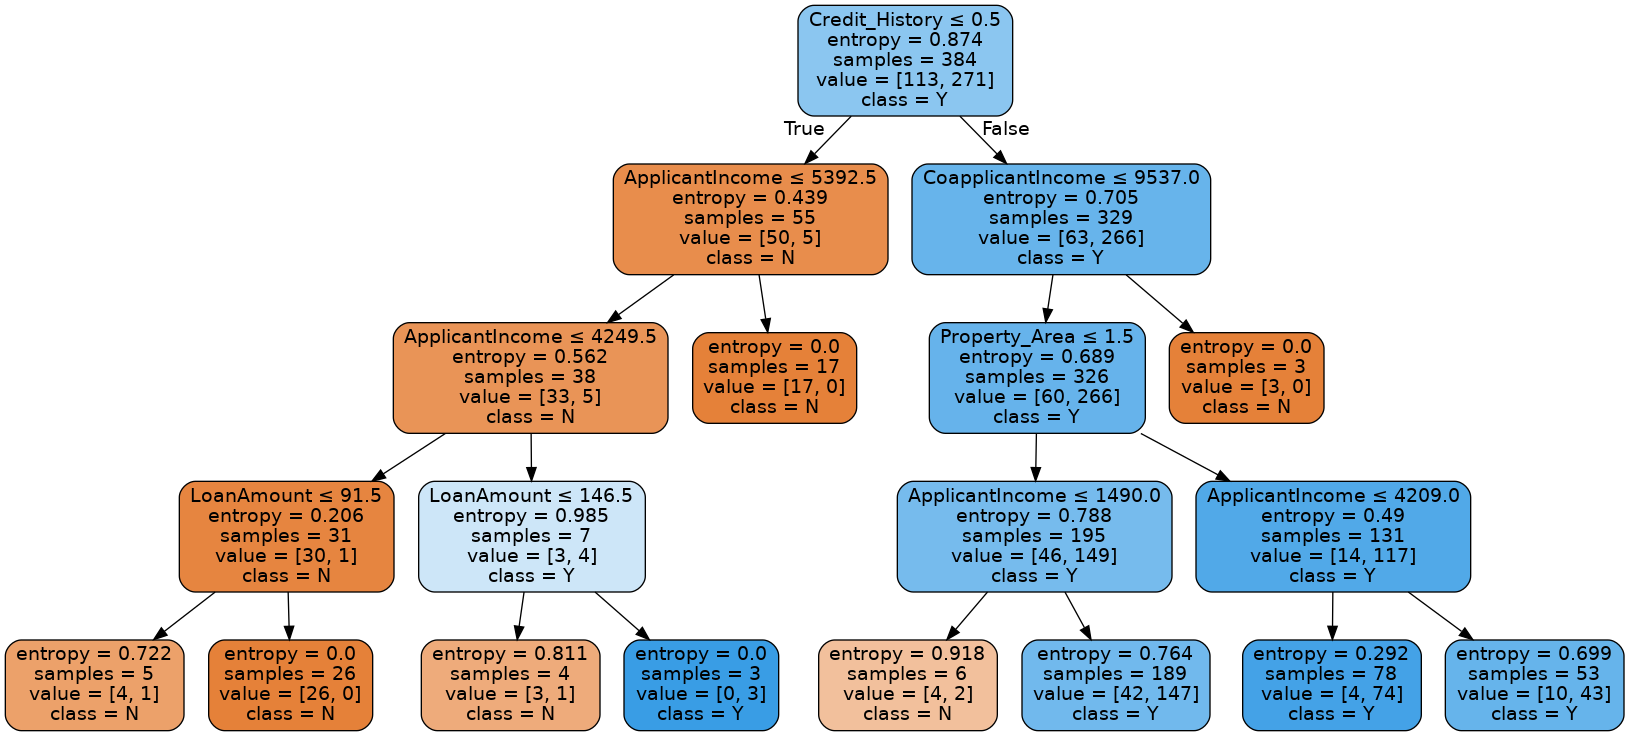

In [60]:
from sklearn import tree
import pydotplus
from IPython.display import Image 
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# generating a graphic for the tree
dot_data = tree.export_graphviz(loan4, out_file=None, 
                         feature_names= x_train.columns,
                         class_names = ["N", "Y"],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## KNN VS DECISION TREE

In [61]:
df = pd.DataFrame(np.array([[precision,recall, accuracy, knn_f1],[precision1, recall1, accuracy1,decision_f1]]),  columns = ["Precision","Recall", "Accuracy","F1-score"], index = ["KNN", "Decision Tree"])
df

,Precision,Recall,Accuracy,F1-score
KNN,0.662651,0.901639,0.645833,0.591725
Decision Tree,0.721519,0.934426,0.729167,0.699702


#### Based on the table above, Decision Tree produced the better accurate model so a decision tree model would be a better use for this dataset